In [1]:
# uncomment this line if you want to use interactive plot (only works in Jupyter but not in VScode)
# %matplotlib ipympl

import time
from pathlib import Path
from operator import itemgetter

import scanpy as sc
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

import os
print(os.getcwd())#显示当前路径
os.chdir('D:/bio/SLAT/SLAT-main')#更改路径，''里面为更改的路径
print(os.getcwd())#显示当前路径
import scSLAT
from scSLAT.model import run_SLAT_multi
from scSLAT.viz import build_3D

D:\bio\jupyter_code\MERFISH
D:\bio\SLAT\SLAT-main


In [2]:
sc.set_figure_params(dpi=100, dpi_save=150)

In [3]:
experiment_name = 'MERFISH'
datasets = ["-0.04","-0.09","-0.14","-0.19","-0.24"]
input_dir = 'G:/dataset/MERFISH/input/'
output_dir = 'G:/dataset/MERFISH/output/SLAT/'

In [4]:
import anndata as ad
adata_list = []

for dataset in datasets:
    # adata = sc.read_visium(input_dir + dataset)
    # adata.var_names_make_unique()
    # adata.obs_names_make_unique()
    
    adata = sc.read_h5ad(input_dir + dataset + '.h5ad')
    df = adata.obs[['x','y']]
    adata.obsm['spatial'] = df.values
    
    adata.obs['annotation'] = adata.obs['Cell_class']
    adata_list.append(adata)

In [5]:
# def load_sample(file):
#     adata = sc.read_visium(file)
#     adata.var_names_make_unique()
#     adata.obs_names_make_unique()
#     adata_label = pd.read_csv(file + '/truth.csv', index_col=0)
#     adata.obs['batch'] = adata_label['batch']
#     adata.obs['annotation'] = adata_label['ground.truth']
#     # adata = sc.read_h5ad(file)
#     # # subsample 8000 cells
#     # adata = sc.pp.subsample(adata, n_obs=8000, random_state=0, copy=True)
#     return adata

# adata1,adata2,adata3,adata4 = Parallel(n_jobs=len(file_list)+1)\
#     (delayed(load_sample)(file) for file in itemgetter(*[2,3,1,0])(file_list))

# print(adata1)
# print(adata2)
# print(adata3)
# print(adata4)

# sc.pl.spatial(adata1, img_key="hires", color='annotation')
# sc.pl.spatial(adata2, img_key="hires", color='annotation')
# sc.pl.spatial(adata3, img_key="hires", color='annotation')
# sc.pl.spatial(adata4, img_key="hires", color='annotation')

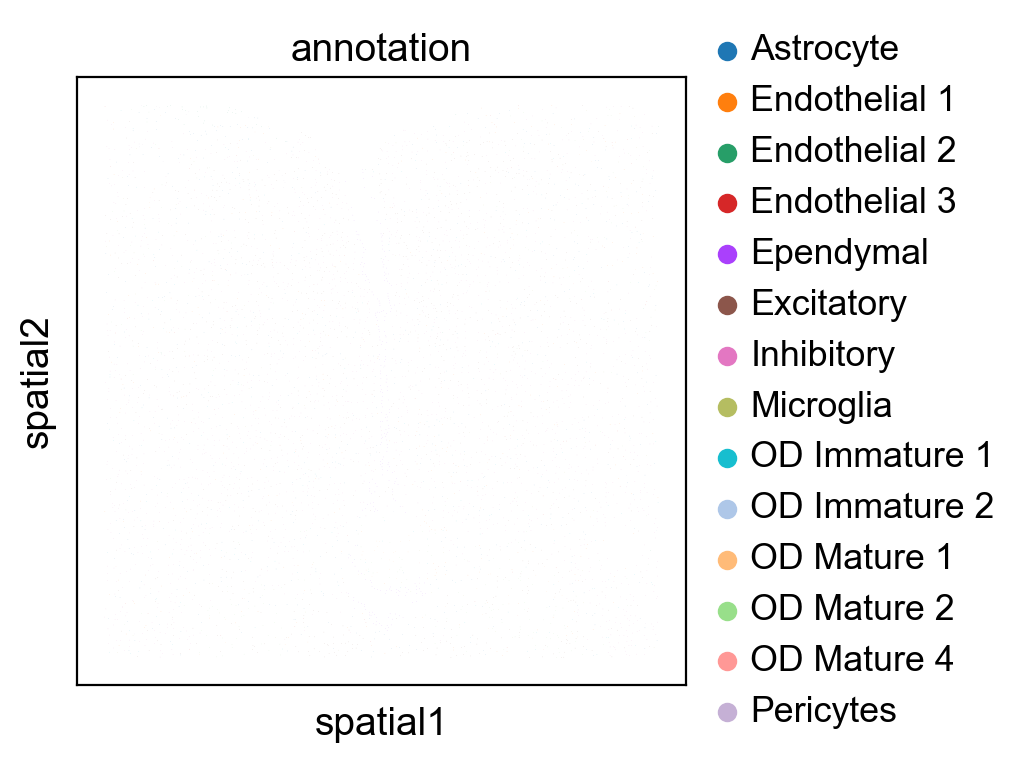

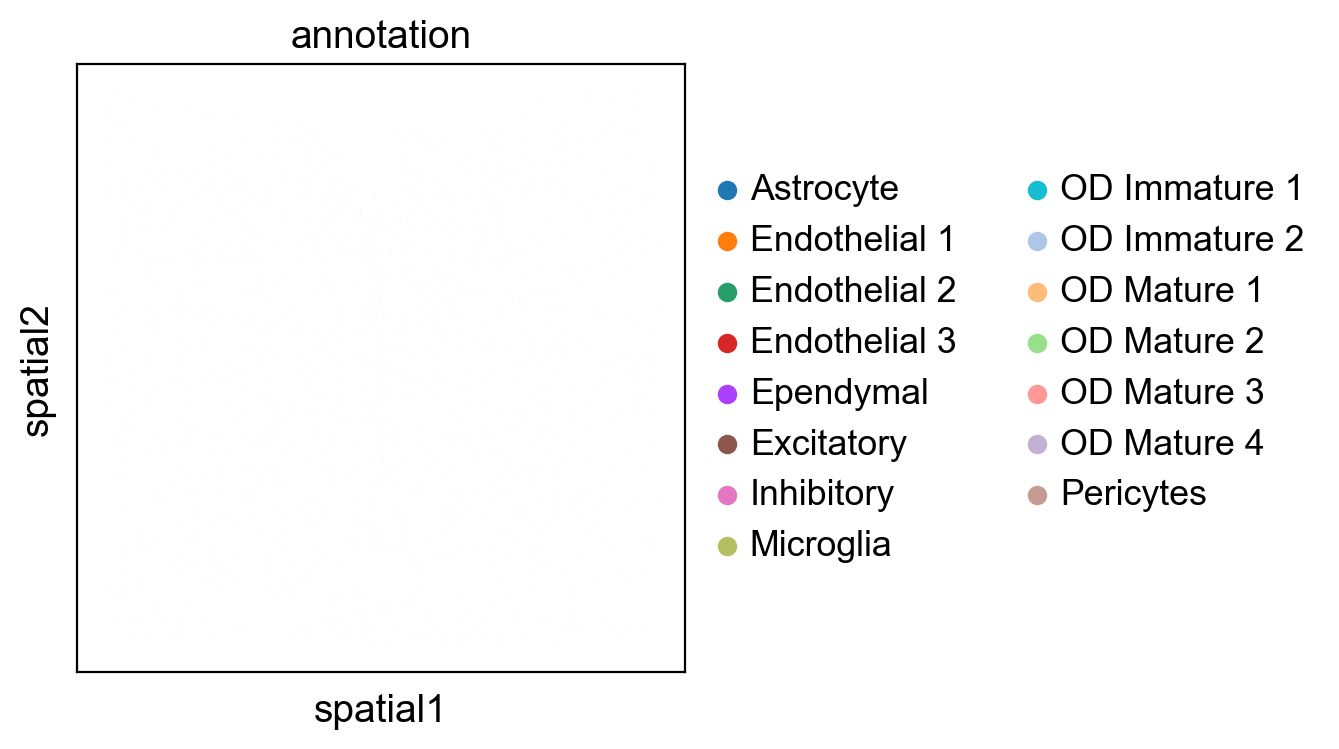

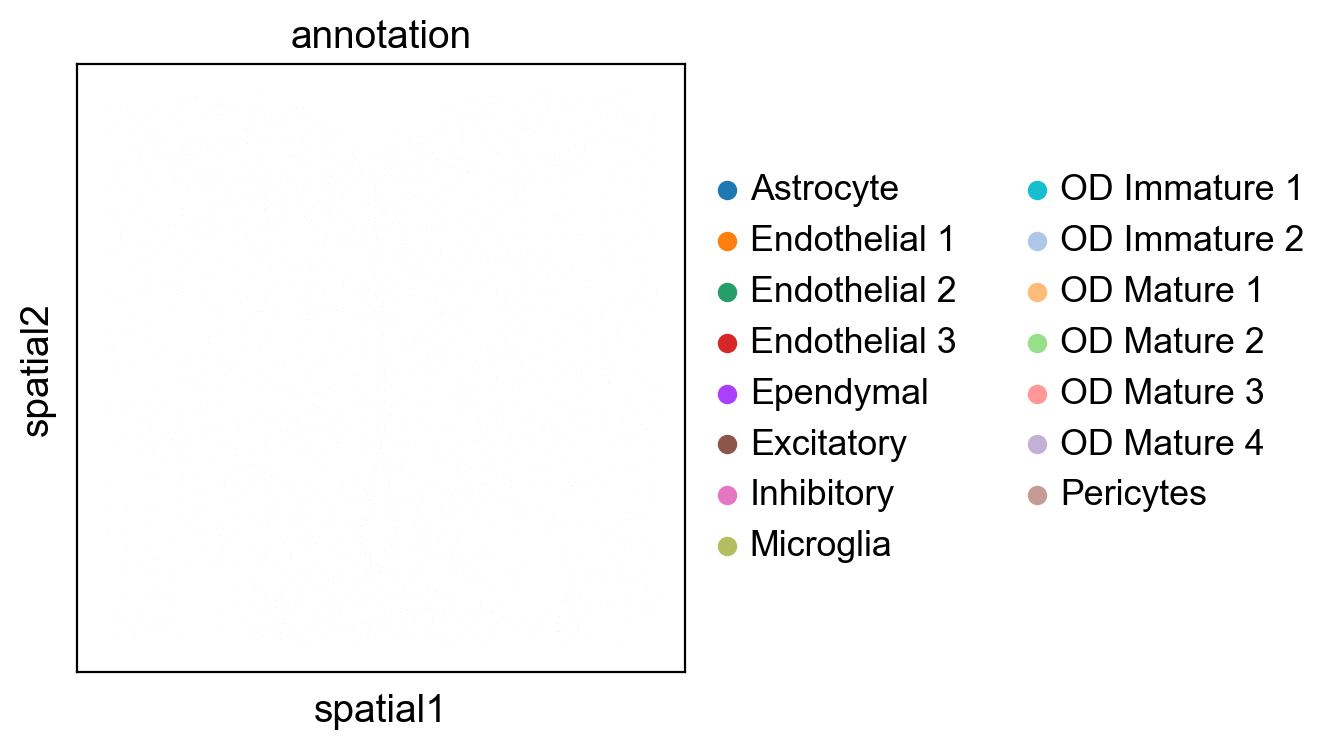

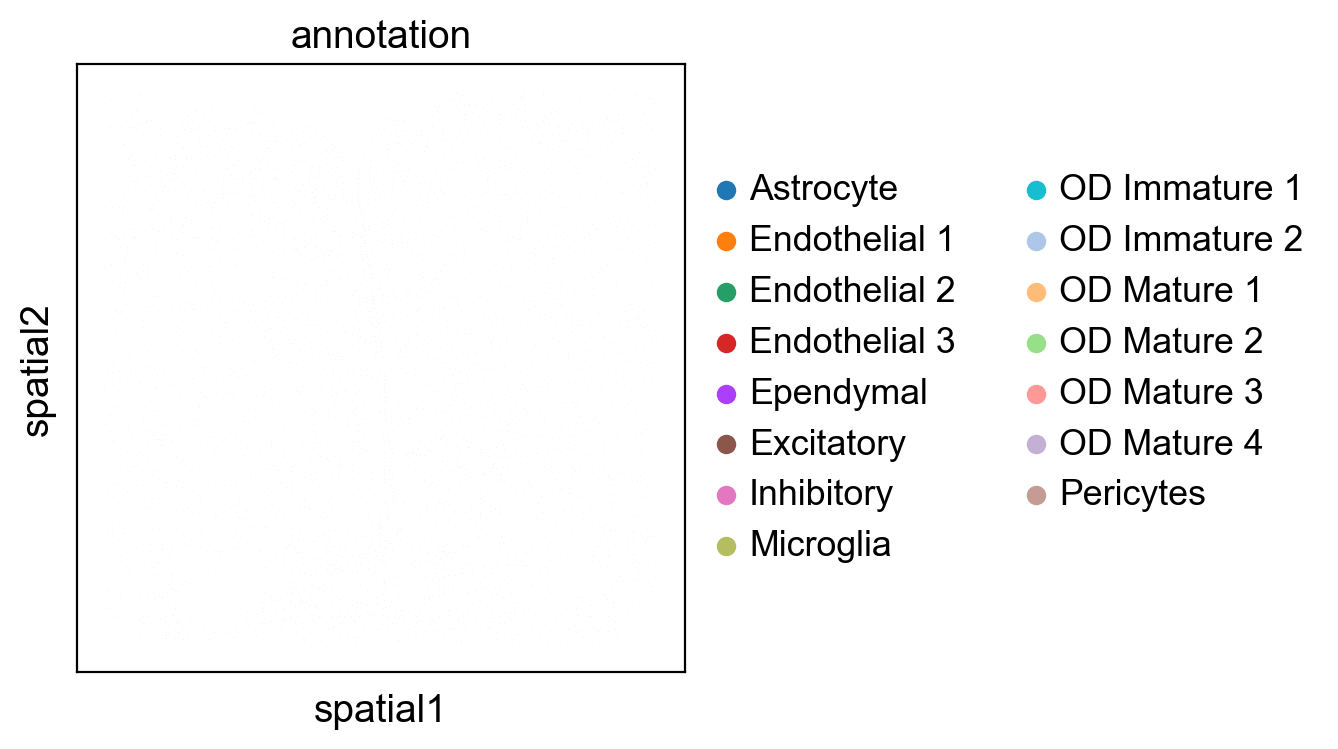

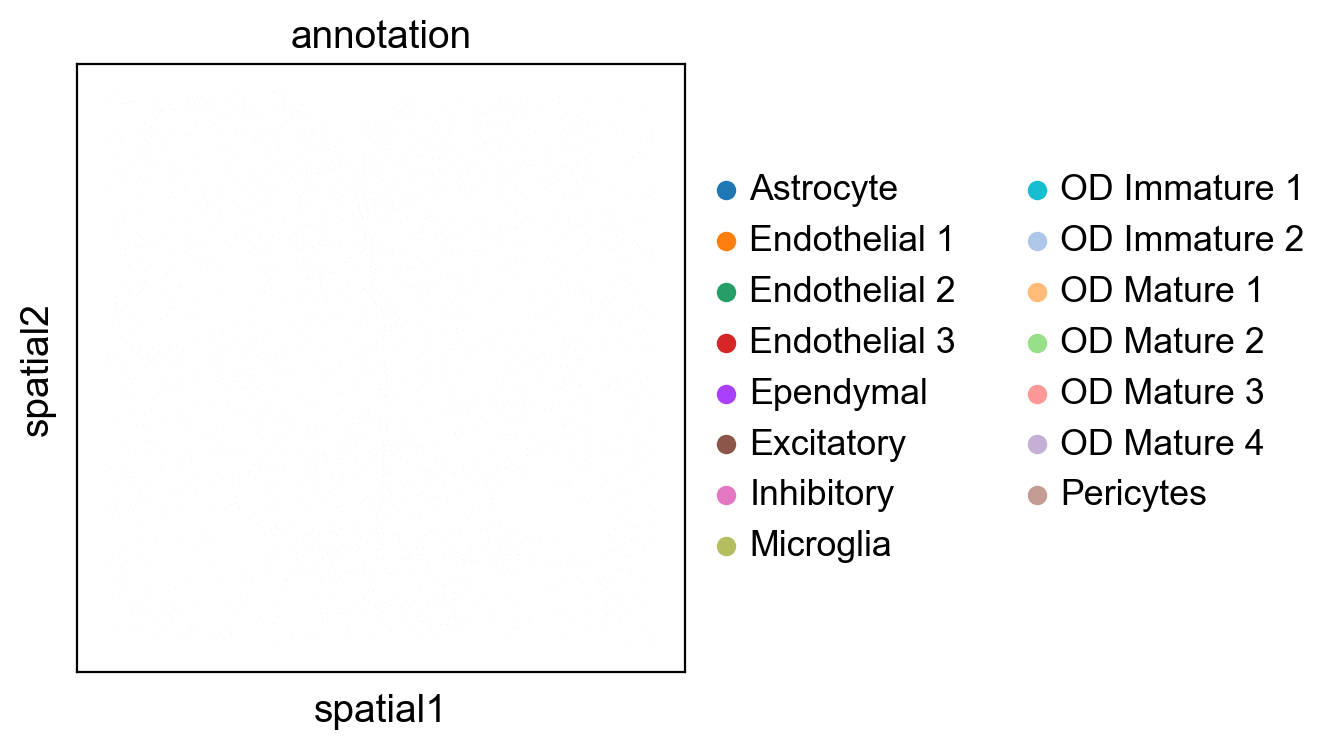

In [6]:
for adata in adata_list:
    sc.pl.spatial(adata, img_key="hires", color='annotation', spot_size = 1)

##### start = time.time()
matching_list, zip_res = run_SLAT_multi(adata_list, k_cutoff=5, n_jobs = 1)
print(f'Use {time.time()-start:.2f} seconds')

In [8]:
# print(matching_list)
# print(zip_res)
# print(adata1)
# print(adata2)
# print(adata3)
# print(adata4)

In [9]:
# index_list = [i[1] for i in zip_res] 
# print(index_list)
# print(index_list[2].shape)

In [10]:
# shape_list = []
# for j, mapping in enumerate(matching_list):
#     print(mapping.shape[1])
#     shape_list.append(mapping.shape[1])

# print(shape_list)

Mapping 0th layer 
Mapping 1th layer 
Mapping 2th layer 
Mapping 3th layer 


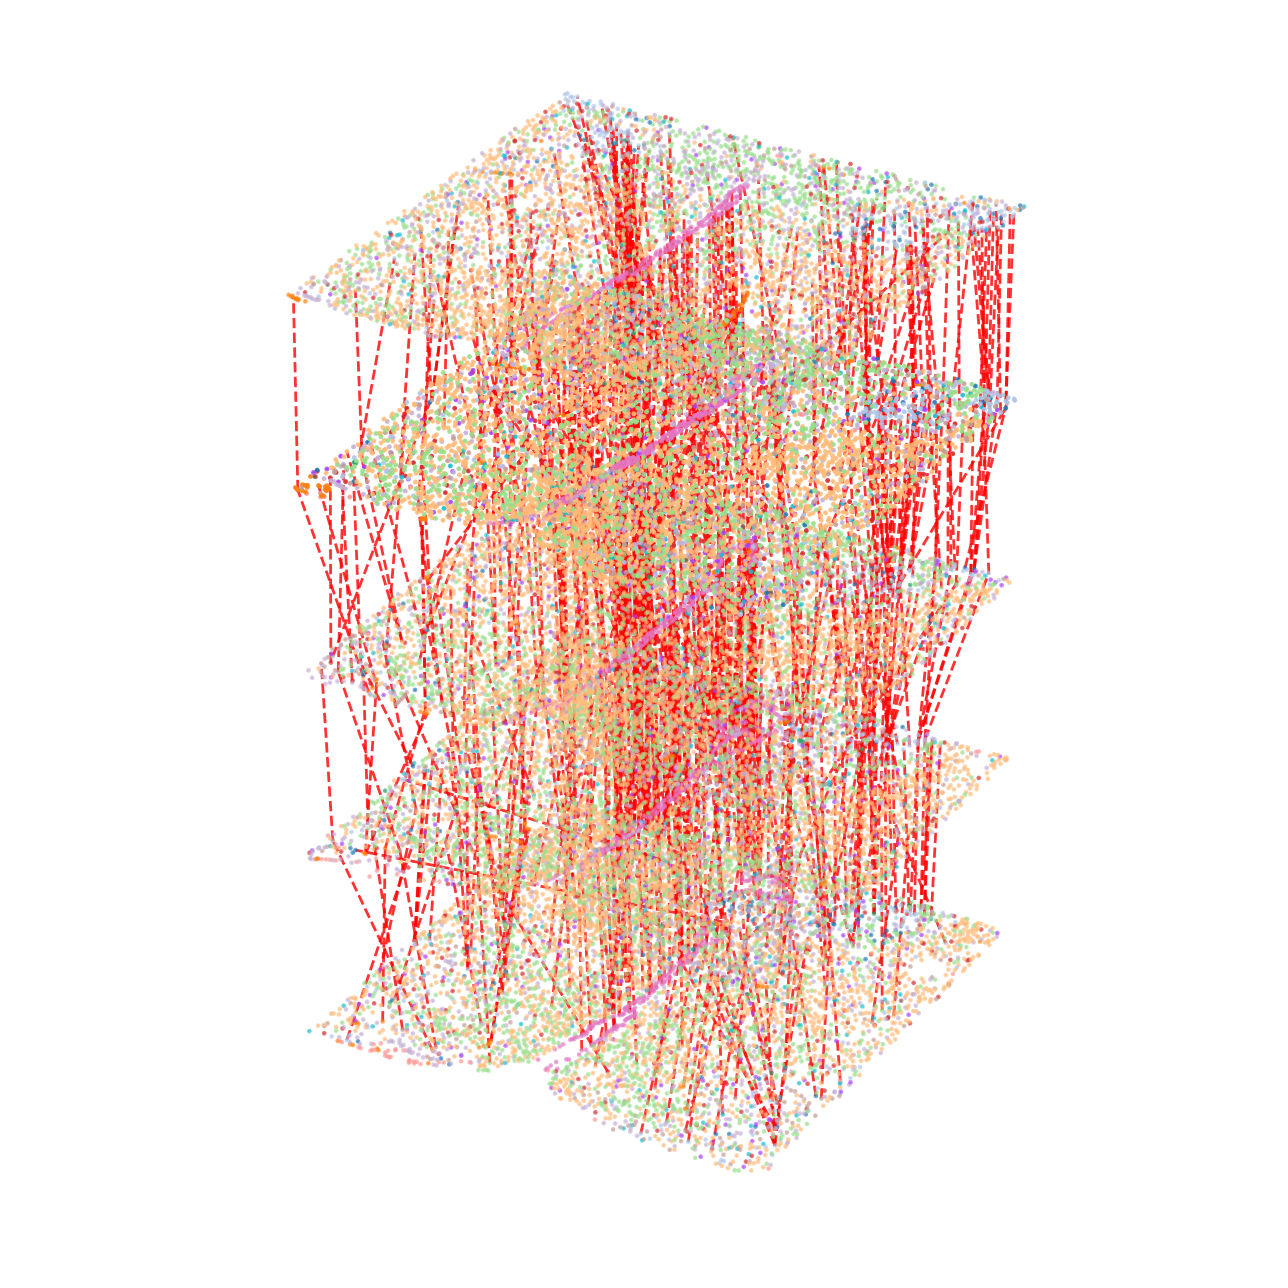

In [11]:
# model = build_3D(adata_list, matching_list, subsample_size = min(shape_list), scale_coordinate = False)
# model.draw_3D(hide_axis=True, line_color='red', height=10, size=[8,20], line_width=1)
model = build_3D(adata_list, matching_list)
model.draw_3D(hide_axis=True, line_color='red', height=10, size=[8,20], line_width=1)

In [12]:
for adata in adata_list:
    adata_df = pd.DataFrame({'index': range(adata.shape[0]),
                        'x': adata.obsm['spatial'][:,0],
                        'y': adata.obsm['spatial'][:,1],
                        'celltype': adata.obs['annotation']})
    adata_df.to_csv(output_dir + 'SLAT_' + experiment_name + '_' + adata.obs['batch'][0] + '.csv')